# Exercise - Bank Marketing Dataset

We use the Bank Marketing Dataset from UCI:

[https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#)

"The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y)."

**Your tasks:**
1.  Load the Dataset "bank-additional-full.csv"
2.  Understand the data (again)
3.  Define your X and y for use with the scikit-learn package. For now, include only numeric features: 'age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'.
4.  Fit and evaluate a decision tree model for classification using a simple train/test split
5.  BONUS: Cross-validate a logistic regression model for the same classification task (see: [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))
6.  Using a train/test split, fit and evaluate a KNN-Classifier. Make sure to scale numeric features and to use one-hot-encoding for categorical features.
7.  BONUS: Cross-validate a machine learning pipeline that includes one-hot-encoded categorical features and scaled numeric features

# 1. Load the Dataset "bank-additional-full.csv"

In [1]:
# Loading required modules for data preparation and some basic plots
import pandas as pd
import seaborn as sns

In [2]:
# loading the csv-file as pandas-DataFrame
df = pd.read_csv("../../data/raw/bank-additional-full.csv", sep=";")

# print the shape of the dataframe
print(df.shape)

# take a look at the first few rows
df.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# 2. Understand the data

In [3]:
# There are some categorical and some numeric features in the dataset:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  str    
 2   marital         41188 non-null  str    
 3   education       41188 non-null  str    
 4   default         41188 non-null  str    
 5   housing         41188 non-null  str    
 6   loan            41188 non-null  str    
 7   contact         41188 non-null  str    
 8   month           41188 non-null  str    
 9   day_of_week     41188 non-null  str    
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  str    
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null  float64
 1

In [4]:
# describe the numeric features in the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [5]:
# a value count of the target
df["y"].value_counts(dropna=False)

y
no     36548
yes     4640
Name: count, dtype: int64

<Axes: xlabel='y', ylabel='count'>

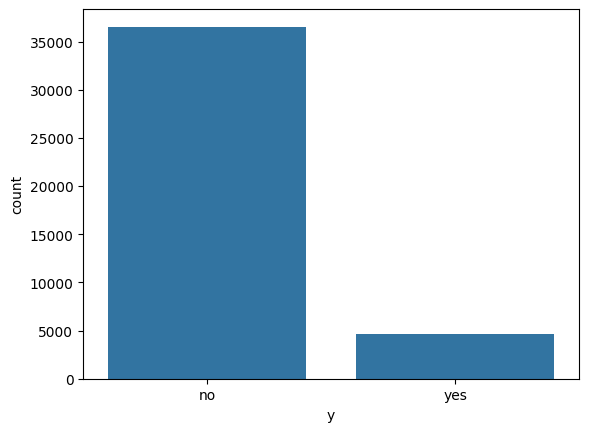

In [6]:
# Also plot a barchart of the target
sns.countplot(x="y", data=df)

<Axes: xlabel='default', ylabel='count'>

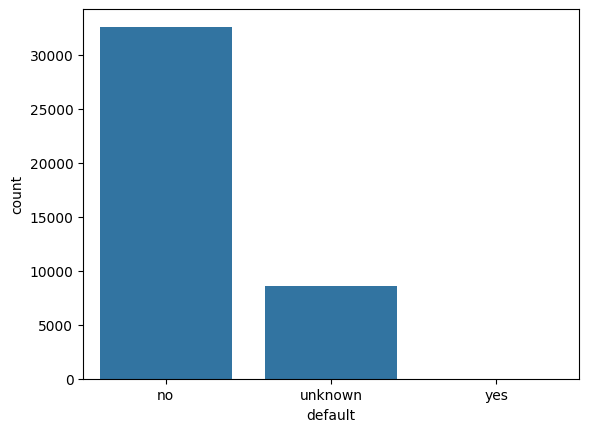

In [7]:
# Also plot a barchart of the target
sns.countplot(x="default", data=df)

In [8]:
df.loc[df.default == "yes", :].shape

(3, 21)

In [9]:
# drop duration
df = df.drop(columns="duration")

# 3. Define your X and y for use with the scikit-learn package

In [10]:
# prepare the dataset for usage with sklearn
feature_names = df.select_dtypes(["int64", "float64"]).columns.to_numpy()
print(f"Numeric Features: {feature_names}")
X = df[feature_names]

print("X.shape:")
print(X.shape)

# many functions in sklearn are easier to use if our binary class problem encodes the target as 0/1 instead of "no"/"yes"!
y = (df["y"] == "yes") * 1
print("y.shape:")
print(y.shape)
print("Examples of y:")
print(y)

Numeric Features: ['age' 'campaign' 'pdays' 'previous' 'emp.var.rate' 'cons.price.idx'
 'cons.conf.idx' 'euribor3m' 'nr.employed']
X.shape:
(41188, 9)
y.shape:
(41188,)
Examples of y:
0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64


# 4. Fit and evaluate a decision tree model for classification using a simple train/test split

In [11]:
# the function train_test_split performs the simple split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# we use 20% as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# create an instance of the DecisionTreeClassifier specifying two hyperparameters
# => https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# model = DecisionTreeClassifier(max_depth=25, min_samples_leaf=1)
model = DecisionTreeClassifier(max_depth=25, min_samples_leaf=10)

# fit the model using the TRAINING dataset
model.fit(X=X_train, y=y_train)

# predict the target ("y"), for both the TRAINING and the TEST dataset
y_train_pred = model.predict(X=X_train)
y_test_pred = model.predict(X=X_test)

# print some evaluation metrics
print("Scores in the training-set:")
print(f"{'accuracy_score':<17}: {accuracy_score(y_true=y_train, y_pred=y_train_pred):5.2f}")
print(f"{'precision_score':<17}: {precision_score(y_true=y_train, y_pred=y_train_pred):5.2f}")
print(f"{'recall_score':<17}: {recall_score(y_true=y_train, y_pred=y_train_pred):5.2f}")
print("Scores in the test-set:")
print(f"{'accuracy_score':<17}: {accuracy_score(y_true=y_test, y_pred=y_test_pred):5.2f}")
print(f"{'precision_score':<17}: {precision_score(y_true=y_test, y_pred=y_test_pred):5.2f}")
print(f"{'recall_score':<17}: {recall_score(y_true=y_test, y_pred=y_test_pred):5.2f}")

print(classification_report(y_true=y_test, y_pred=y_test_pred))

Scores in the training-set:
accuracy_score   :  0.91
precision_score  :  0.71
recall_score     :  0.36
Scores in the test-set:
accuracy_score   :  0.89
precision_score  :  0.53
recall_score     :  0.30
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7298
           1       0.53      0.30      0.39       940

    accuracy                           0.89      8238
   macro avg       0.72      0.63      0.66      8238
weighted avg       0.87      0.89      0.88      8238



# 5. Cross-validate a logistic regression model for the same classification task

see: [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)



In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_validate

# create an instance of LogisticRegression
model = LogisticRegression(solver="liblinear")

kf = KFold(n_splits=3, shuffle=True, random_state=123)

# cross_val_score expects a model-instance, X and y (here: the whole dataset), and a number of folds
cv_scores = cross_validate(
    model,
    X,
    y,
    cv=kf,
    scoring=["accuracy", "precision", "recall"],
    return_train_score=True,
)

cv_scores = pd.DataFrame(cv_scores)
cv_scores.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fit_time,3.0,0.044317,0.006321,0.037065,0.042147,0.047230,0.047943,0.048655
score_time,3.0,0.005512,0.000191,0.005294,0.005447,0.005599,0.005622,0.005644
test_accuracy,3.0,0.899461,0.000823,0.898754,0.899009,0.899264,0.899814,0.900364
train_accuracy,3.0,0.899546,0.000476,0.899082,0.899303,0.899523,0.899778,0.900033
test_precision,3.0,0.700617,0.013847,0.687345,0.693438,0.699531,0.707253,0.714976
train_precision,3.0,0.702077,0.006787,0.694344,0.699592,0.704841,0.705943,0.707046
test_recall,3.0,0.187687,0.006164,0.180574,0.185800,0.191026,0.191244,0.191462
train_recall,3.0,0.188138,0.003547,0.185714,0.186102,0.186490,0.189349,0.192209


# 6.Using a train/test split, fit and evaluate a KNN-Classifier. Make sure to scale numeric features and to use one-hot-encoding for categorical features.

In [13]:
# the function train_test_split performs the simple split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# prepare the dataset for usage with sklearn
numeric_features = df.select_dtypes(["float64", "int64"]).columns.tolist()
print(f"Numeric features: {numeric_features}")
categorical_features = df.drop("y", axis=1).select_dtypes(["object", "string"]).columns.tolist()
print(f"Categorical features: {categorical_features}")
X = df[numeric_features + categorical_features]
y = (df["y"] == "yes") * 1

# we use 20% as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# create an instance of the KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)

# create and fit the transformer-objects
# Make transformers return pandas DataFrames like in the demo
onehot = OneHotEncoder(sparse_output=False).set_output(transform="pandas")  # here, we do not drop any of the one-hot-columns!
scaler = StandardScaler().set_output(transform="pandas")
onehot.fit(X_train[categorical_features])
scaler.fit(X_train[numeric_features])

# apply the transformers to the respective columns in the training set
# .transform() now returns a pandas DataFrame so we can keep the result as-is
X_train_onehot = onehot.transform(X_train[categorical_features])
X_train_scaled = scaler.transform(X_train[numeric_features])

# combine the two prepared DataFrames
X_train_prepped = pd.concat([X_train_onehot, X_train_scaled], axis=1)

# fit the model using the TRAINING dataset
model.fit(X=X_train_prepped, y=y_train)

# predict the target ("y"), for both the TRAINING set
y_train_pred = model.predict(X=X_train_prepped)

# prepare the test set and predict for it, as well
X_test_onehot = onehot.transform(X_test[categorical_features])
X_test_scaled = scaler.transform(X_test[numeric_features])
X_test_prepped = pd.concat([X_test_onehot, X_test_scaled], axis=1)
y_test_pred = model.predict(X=X_test_prepped)

# print some evaluation metrics

print("Scores in the test-set:")
print(f"{'accuracy_score':<17}: {accuracy_score(y_true=y_test, y_pred=y_test_pred):5.2f}")
print(f"{'precision_score':<17}: {precision_score(y_true=y_test, y_pred=y_test_pred):5.2f}")
print(f"{'recall_score':<17}: {recall_score(y_true=y_test, y_pred=y_test_pred):5.2f}")

Numeric features: ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


Scores in the test-set:
accuracy_score   :  0.90
precision_score  :  0.62
recall_score     :  0.26


# 7. Cross-validate a machine learning pipeline that includes one-hot-encoded categorical features and scaled numeric features

In [14]:
# the function train_test_split performs the simple split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# prepare the dataset for usage with sklearn
numeric_features = df.select_dtypes(["float64", "int64"]).columns.tolist()
print(f"Numeric features: {numeric_features}")
categorical_features = df.drop("y", axis=1).select_dtypes(["object", "string"]).columns.tolist()
print(f"Categorical features: {categorical_features}")
X = df[numeric_features + categorical_features]
y = (df["y"] == "yes") * 1

# create the ColumnTransformer for the Pipeline
# Use drop='first' for one-hot encoding to provide a baseline category (helpful for linear models)
# and set transformers to return pandas DataFrames for easier downstream handling.
onehot = OneHotEncoder(drop="first", sparse_output=False).set_output(transform="pandas")
scaler = StandardScaler().set_output(transform="pandas")
col_trans = ColumnTransformer(
    # transformers are provided in a list
    transformers=[
        # each transformer is passed as a tuple ('name', transformer_obj, feature_list)
        ("oh", onehot, categorical_features),
        ("sc", scaler, numeric_features),
    ]
).set_output(transform="pandas")

# create an instance of the KNeighborsClassifier
base_model = KNeighborsClassifier(n_neighbors=10)
ensemble_model = BaggingClassifier(
    estimator=base_model, n_estimators=5, random_state=123, max_samples=0.5
)

# create the pipeline
pipe = Pipeline(steps=[("preprocessing", col_trans), ("ensemble", ensemble_model)])

# cross-validate the Pipeline
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)
cv_results = cross_validate(pipe, X, y, cv=kf, scoring=["accuracy", "precision", "recall"])
pd.DataFrame(cv_results).describe().transpose()

Numeric features: ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


,count,mean,std,min,25%,50%,75%,max
fit_time,3.0,0.166027,0.061916,0.129901,0.130281,0.130660,0.184090,0.237520
score_time,3.0,1.452715,0.020109,1.430814,1.443899,1.456983,1.463665,1.470347
test_accuracy,3.0,0.897446,0.001585,0.896358,0.896537,0.896715,0.897990,0.899264
test_precision,3.0,0.607589,0.010933,0.597179,0.601895,0.606612,0.612795,0.618978
test_recall,3.0,0.252591,0.019301,0.237233,0.241758,0.246283,0.260270,0.274256


In [15]:
# We can also reuse the ColumnTransformer with another model inside the pipeline
from sklearn.svm import SVC

# create an instance of the BaggingClassifier
ensemble_model_svc = BaggingClassifier(
    estimator=SVC(), n_estimators=5, random_state=123, max_samples=0.1
)

# create the pipeline
pipe = Pipeline(steps=[("preprocessing", col_trans), ("ensemble", ensemble_model_svc)])

# cross-validate the Pipeline
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)
cv_results = cross_validate(pipe, X, y, cv=kf, scoring=["accuracy", "precision", "recall"])
pd.DataFrame(cv_results).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fit_time,3.0,1.665539,1.654639,0.638811,0.711146,0.783481,2.178903,3.574324
score_time,3.0,2.584648,0.301779,2.364587,2.412638,2.460689,2.694678,2.928667
test_accuracy,3.0,0.899073,0.000481,0.898543,0.898867,0.899191,0.899337,0.899483
test_precision,3.0,0.684805,0.005128,0.680000,0.682105,0.684211,0.687208,0.690205
test_recall,3.0,0.192889,0.007018,0.184874,0.190368,0.195863,0.196897,0.197930
